# 多元线性回归 LinearRegression

$$\hat{y_i} = w_0 + w_1x_{i1} + w_2x_{i2} + ... + w_nx_{in}$$

其中 $w$ 被称为模型的参数，而 $w_0$ 被称为截距，$w_1～w_n$ 被称为回归系数，当有 m 各样本时，有：

$$\hat{\boldsymbol y_i} = w_0 + w_1\boldsymbol x_{i1} + w_2\boldsymbol x_{i2} + ... + w_n \boldsymbol x_{in}$$

其中 $\hat{\boldsymbol y_i}$ 和后面的粗体小写字母都代表列向量，则有：

$$\hat{\boldsymbol y} = \boldsymbol X  \omega$$

构造损失函数：

$$\sum_{i=1}^{m}{(y_i-\hat{y_i})^2} = \sum_{i=1}^{m}{(y_i-\boldsymbol X_i  \omega)^2}$$

其实就是 L2 范数的平方，因此我们的求解目标变为：

$$\min_\omega||y_i-\boldsymbol X \omega||_2^2$$

称上式为 RSS 参差平方和

用最小二乘法求解 $\omega$

$$
\begin{align}
\frac{\partial RSS}{\partial \omega} &= \frac{\partial ||y- X \omega||_2^2}{\partial \omega}\\
&= \frac{\partial (y- X \omega)^T(y- X \omega)}{\partial \omega}\\
&= \frac{\partial (y^T- \omega ^T X^T )(y- X \omega)}{\partial \omega}\\
&= \frac{\partial (y^Ty- \omega ^TX^Ty -y^T X \omega +  \omega ^TX^TX\omega)}{\partial \omega}\\
\end{align}
$$

其中，有如下规则：
$$$$

导入数据集，加州房价

In [29]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
data = pd.read_csv('data/cal_house.csv', header=None)
data.shape

(20640, 9)

(20640, 9)

In [31]:
data.head()

,0,1,2,3,4,5,6,7,8
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200


,0,1,2,3,4,5,6,7,8
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200


In [32]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [33]:
y = y /100000

In [34]:
X.head(3)

,0,1,2,3,4,5,6,7
0,-122.23,37.88,41,880,129,322,126,8.3252
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014
2,-122.24,37.85,52,1467,190,496,177,7.2574


,0,1,2,3,4,5,6,7
0,-122.23,37.88,41,880,129,322,126,8.3252
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014
2,-122.24,37.85,52,1467,190,496,177,7.2574


In [35]:
y.head(3)

0    4.526
1    3.585
2    3.521
Name: 8, dtype: float64

0    4.526
1    3.585
2    3.521
Name: 8, dtype: float64

In [36]:
y.max()

5.00001

5.00001

In [37]:
y.min()

0.14999

0.14999

In [38]:
X.columns = ['Longitude', 'Latitude', 'HouseAge', '3', '4', '5', '6', 'Averooms']

In [39]:
X.head()

,Longitude,Latitude,HouseAge,3,4,5,6,Averooms
0,-122.23,37.88,41,880,129,322,126,8.3252
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014
2,-122.24,37.85,52,1467,190,496,177,7.2574
3,-122.25,37.85,52,1274,235,558,219,5.6431
4,-122.25,37.85,52,1627,280,565,259,3.8462


,Longitude,Latitude,HouseAge,3,4,5,6,Averooms
0,-122.23,37.88,41,880,129,322,126,8.3252
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014
2,-122.24,37.85,52,1467,190,496,177,7.2574
3,-122.25,37.85,52,1274,235,558,219,5.6431
4,-122.25,37.85,52,1627,280,565,259,3.8462


In [40]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=20)

In [41]:
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

In [42]:
Xtrain.shape

(14448, 8)

(14448, 8)

建模

In [43]:
reg = LR().fit(Xtrain, Ytrain)

In [44]:
yhat = reg.predict(Xtest)
yhat

array([1.3182392 , 2.83655696, 1.68182563, ..., 1.72888459, 1.86319055,
       3.72201747])

array([1.3182392 , 2.83655696, 1.68182563, ..., 1.72888459, 1.86319055,
       3.72201747])

查看系数向量

In [45]:
reg.coef_

array([-4.26091798e-01, -4.27124496e-01,  1.17451444e-02, -7.32653196e-05,
        1.22223399e-03, -4.40444690e-04,  4.79734750e-04,  3.95461802e-01])

array([-4.26091798e-01, -4.27124496e-01,  1.17451444e-02, -7.32653196e-05,
        1.22223399e-03, -4.40444690e-04,  4.79734750e-04,  3.95461802e-01])

查看截距

In [46]:
reg.intercept_

-35.60496649301163

-35.60496649301163

### 评价指标
- 均方误差 MSE

In [47]:
from sklearn.metrics import mean_squared_error as MSE

In [48]:
MSE(yhat, Ytest)

0.5009732272303125

0.5009732272303125

In [49]:
Ytest.mean()

2.058198464147277

2.058198464147277

在这里，均方误差被加上了负号，是 neg_mean_squared_error

In [59]:
cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')

array([-16.54230029, -12.03980881,  -1.41468185, -14.58206766,
       -11.99433944,  -4.67301942,  -7.98306471, -15.86221336,
       -10.45372819, -12.49865518])

array([-16.54230029, -12.03980881,  -1.41468185, -14.58206766,
       -11.99433944,  -4.67301942,  -7.98306471, -15.86221336,
       -10.45372819, -12.49865518])

但是，仅仅用 MSE 并不能判断出模型的好坏，不能看到趋势、规律、单调性等其他信息

### R平方
$$ R^2 = 1 - \frac{u}{v} $$
其中：
$$ u = \sum_{i=1}^{N} {(f_i - y_i)^2}  \quad v = \sum_{i=1}^{N} {(y_i - \hat{y})^2} $$
$u$ 是残差平方和，$v$ 是总平方和，$f_i$ 是模型预测值，$y_i$ 是样本真实值，$\hat{y}$ 是样本标签平均值

在统计学中对变量进行线性回归分析，采用最小二乘法进行参数估计时，**R平方为回归平方和与总离差平方和的比值**，表示总离差平方和中可以由回归平方和解释的比例，这一比例越大越好，模型越精确，回归效果越显著。R平方介于0~1之间，**越接近1，回归拟合效果越好，一般认为超过0.8的模型拟合优度比较高。**

In [51]:
from sklearn.metrics import r2_score

In [52]:
r2_score(yhat, Ytest)

0.40737435653958265

0.40737435653958265

In [53]:
reg.score(Xtest, Ytest)

0.6322466228834391

0.6322466228834391

上面 score 的衡量标准也是 R平方，为什么不一样呢？这是**因为r2_score()参数顺序错了，要指定哪个是真实值，那个是预测值！**

In [54]:
r2_score(Ytest, yhat)

0.6322466228834391

0.6322466228834391

这就一样了

画个图看一看

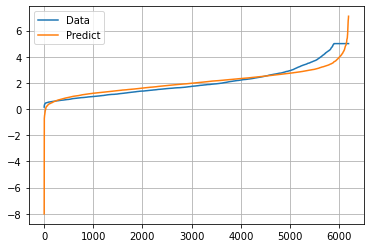

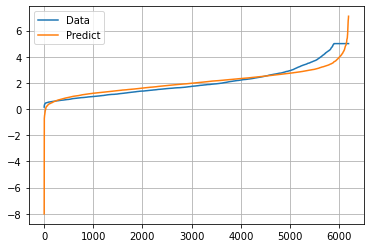

In [55]:
sorted(Ytest)
plt.plot(range(len(Ytest)), sorted(Ytest), label='Data')
plt.plot(range(len(Ytest)), sorted(yhat), label='Predict')
plt.grid()
plt.legend()
plt.show()

In [58]:
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2')

array([-179.67801121,   -5.64393241,  -15.11678926,  -76.73446025,
        -67.51770004])

array([-179.67801121,   -5.64393241,  -15.11678926,  -76.73446025,
        -67.51770004])

诶？R平方怎么还能取到负数呢？

其实，模型预测值和真实值的距离的差距，如果和真实值到均值的差距符号相反，则R平方就有可能是负的。

## 多重共线性

在上面的推导过程中，左乘 $X^TX$ 有一个大前提，就是逆矩阵存在，而逆矩阵存在的充分必要条件是矩阵不存在多重共线性

**多重共线性**：特征矩阵对应的行列式，在进行处等行变换或者初等列变换时，一行或一列可以通过加减乘除运算，让另一行或一列变成全零或者非常接近0，则称为两行有**精确相关关系**或者**高度相关关系**，在这样的情况下，矩阵的行列式非常接近零，所以求得的权重 $\omega$ 非常大，对建模结果造成偏差或者模型不可用。

### 岭回归
岭回归在多元线性回归的损失函数基础上加上了 L2 范数乘以正则化系数 $\alpha$,损失函数为：

$$\min_\omega||X\omega-y||^2_2+\alpha||\omega||^2$$